# MIBI Analysis Pipeline

## 1 Getting Setup Ready

### 1.1 Adding Paths to Sys Path

In [1]:
import sys
import os
sys.path.insert(0,'..')

### 1.2 Import Libraries

In [2]:
from datetime import datetime

from config.config_settings import Config
from src.data_analysis._shape_quantification_metrics import *
from src.data_analysis.dimensionality_reduction_clustering import DimensionalityReductionClusteringAnalyzer
from src.data_analysis.positive_vessel_summary_analyzer import PositiveVesselSummaryAnalyzer
from src.data_analysis.vessel_asymmetry_analyzer import VesselAsymmetryAnalyzer
from src.data_loading.mibi_data_feed import MIBIDataFeed
from src.data_loading.mibi_loader import MIBILoader
from src.mibi_pipeline import MIBIPipeline
from src.utils.utils_functions import mkdir_p

### 1.3 Setting Paths

In [3]:
# Path to MIBI Data
data_loc = "/media/aswin/large_storage/oliveria_data/data/hires"

# Path to Masks
masks_loc = "/media/aswin/large_storage/oliveria_data/masks/hires"

# Path to Save Results
results_dir = "/media/aswin/large_storage/results/experiment_%s/" % datetime.now().strftime("%d_%m_%Y_%H:%M:%S")
mkdir_p(results_dir)

# OPTIONAL: Path to Saved CSV of Previous Pipeline Run
csv_loc = "/media/aswin/large_storage/results/5um_impansion_5um_expansion.csv"

## 2 Create Data Feed

In [4]:
conf = Config()

hires_feed = MIBIDataFeed(
    feed_data_loc=data_loc,
    feed_mask_loc=masks_loc,
    feed_name="Hires",
    n_points=48
)

## 3 Data Preprocessing

In [5]:
pipe = MIBIPipeline(conf, results_dir, csv_loc=csv_loc)
pipe.add_feed(hires_feed)
pipe.load_preprocess_data()

# Analyzers we would like to run
pipe.add_analyzer(VesselAsymmetryAnalyzer) 
pipe.add_analyzer(PositiveVesselSummaryAnalyzer)
pipe.add_analyzer(DimensionalityReductionClusteringAnalyzer)

pipe.analyze_data(mask_type="expansion_only", 
                  marker_settings="all_markers",
                  shape_quantification_method={
                          "Name": "Solidity",
                          "Metric": solidity
                      }
                 )

INFO:Loading data feeds

100%|██████████| 48/48 [00:07<00:00,  6.18it/s]


Configuration:
	SMA_positive_threshold         = 0.1
	all_masks                      = ['astrocytes', 'BBB', 'largevessels', 'microglia', 'myelin', 'plaques', 'tangles', 'allvessels']
	brain_region_names             = ['MFG', 'HIP', 'CAUD']
	brain_region_point_ranges      = [(1, 16), (17, 32), (33, 48)]
	caud_hip_mfg_separate_dir      = False
	create_allpoints_expansion_line_plots = False
	create_biaxial_scatter_plot    = False
	create_blurred_vessels_mask    = False
	create_brain_region_expansion_heatmaps = False
	create_brain_region_expansion_line_plots = False
	create_categorical_split_expansion_heatmaps = False
	create_categorical_violin_plot = False
	create_categorical_violin_plot_with_images = True
	create_continuous_scatter_plot = False
	create_embedded_vessel_id_masks = False
	create_expanded_vessel_masks   = False
	create_expansion_box_plots     = False
	create_expansion_ring_plots    = False
	create_expansion_violin_plots  = False
	create_expression_histogram    = False
	crea

INFO:
|    | Marker        |   % Positive Vessels |   % Negative Vessels |   # Positive Vessels |   # Negative Vessels |
|---:|:--------------|---------------------:|---------------------:|---------------------:|---------------------:|
|  0 | HH3           |             61.9482  |             38.0518  |                 1291 |                  793 |
|  1 | CD45          |             17.4184  |             82.5816  |                  363 |                 1721 |
|  2 | HLADR         |             37.62    |             62.38    |                  784 |                 1300 |
|  3 | Iba1          |             53.167   |             46.833   |                 1108 |                  976 |
|  4 | CD47          |             34.7409  |             65.2591  |                  724 |                 1360 |
|  5 | ABeta42       |              4.12668 |             95.8733  |                   86 |                 1998 |
|  6 | polyubiK48    |             31.142   |             68.858   |      

<Figure size 864x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## 4 Visualizations Sandbox

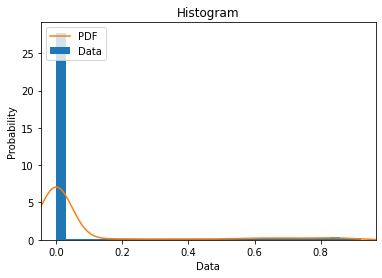

In [6]:
# Expression Histograms
pipe.visualizer.expression_histogram()

In [7]:
pipe.visualizer.categorical_violin_plot_with_images(mask_type="mask_and_expansion",
                                                   outward_expansion=5,
                                                   analysis_variable="Solidity")

../src/data_visualization/visualizer.py:1099: RuntimeWarning: invalid value encountered in true_divide
  normed_data = (marker_dict[marker] - np.min(marker_dict[marker])) / (
../src/data_visualization/visualizer.py:1124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(constrained_layout=True, figsize=(40, 15))


<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>

<Figure size 2880x1080 with 0 Axes>